In [9]:
# Step 1: Load and Explore the Dataset


In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving heart_disease.xlsx to heart_disease.xlsx


In [5]:
df = pd.read_excel("heart_disease.xlsx", sheet_name = "Heart_disease")

In [6]:
# Display the first few rows
print(df.head())

   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


In [7]:
# Display dataset information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None


In [8]:
# Check for missing values
print(df.isnull().sum())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [13]:
# Check column names
print("Column Names:", df.columns)

Column Names: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')


In [10]:
# Step 2: Exploratory Data Analysis (EDA)
# Summary statistics
print(df.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


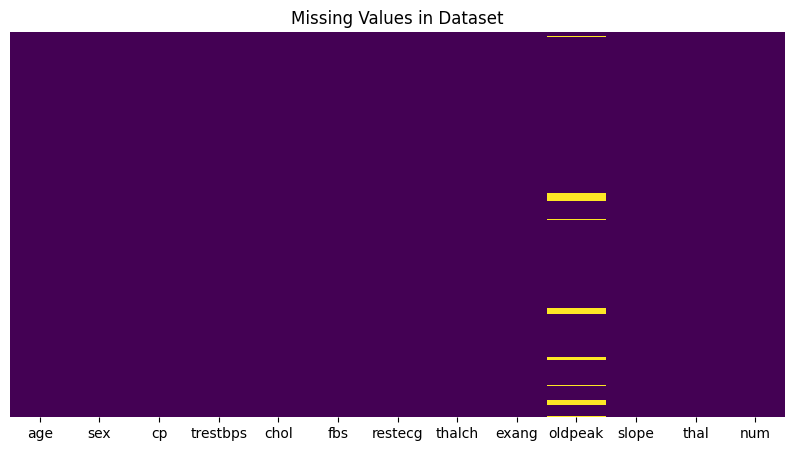

In [11]:
# Visualizing missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset")
plt.show()


In [22]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')


In [23]:
df.columns = df.columns.str.strip()

In [24]:
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')


In [25]:
df.rename(columns={'num': 'target'}, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [33]:
from sklearn import preprocessing

In [34]:
#complete heart_disease dataset
label_encoder = preprocessing.LabelEncoder()
df['sex1'] = label_encoder.fit_transform(df['sex'])

#move that new column beside of that cloumn
cols = df.columns.tolist()
cols.insert(cols.index('sex') + 1, cols.pop(cols.index('sex1')))
df = df[cols]

#delete old cloumn
df = df.drop('sex', axis=1)

df.head()

,age,sex1,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,1,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,1,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,1,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [36]:
#complete heart_disease dataset
label_encoder = preprocessing.LabelEncoder()
df['restecg1'] = label_encoder.fit_transform(df['restecg'])

#move that new column beside of that cloumn
cols = df.columns.tolist()
cols.insert(cols.index('restecg') + 1, cols.pop(cols.index('restecg1')))
df = df[cols]

#delete old cloumn
df = df.drop('restecg', axis=1)

df.head()

,age,sex1,cp,trestbps,chol,fbs,restecg1,thalch,exang,oldpeak,slope,thal,target
0,63,1,typical angina,145,233,True,0,150,False,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,False,1,132,False,0.0,flat,fixed defect,0
2,57,1,asymptomatic,140,192,False,1,148,False,0.4,flat,fixed defect,0
3,52,1,typical angina,118,186,False,0,190,False,0.0,flat,fixed defect,0
4,57,1,asymptomatic,110,201,False,1,126,True,1.5,flat,fixed defect,0


In [37]:
df_data = df.iloc[:,0:12]

In [38]:
colnames = list(df_data.columns)
colnames

['age',
 'sex1',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg1',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal']

In [42]:
#complete heart_disease dataset
label_encoder = preprocessing.LabelEncoder()
df['cp1'] = label_encoder.fit_transform(df['cp'])

#move that new column beside of that cloumn
cols = df.columns.tolist()
cols.insert(cols.index('cp') + 1, cols.pop(cols.index('cp1')))
df = df[cols]

#delete old cloumn
df = df.drop('cp', axis=1)

df.head()

,age,sex1,cp1,trestbps,chol,fbs,restecg1,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,True,0,150,False,2.3,downsloping,fixed defect,0
1,41,1,1,135,203,False,1,132,False,0.0,flat,fixed defect,0
2,57,1,0,140,192,False,1,148,False,0.4,flat,fixed defect,0
3,52,1,3,118,186,False,0,190,False,0.0,flat,fixed defect,0
4,57,1,0,110,201,False,1,126,True,1.5,flat,fixed defect,0


In [45]:
#complete heart_disease dataset
label_encoder = preprocessing.LabelEncoder()
df['fbs1'] = label_encoder.fit_transform(df['fbs'])

#move that new column beside of that cloumn
cols = df.columns.tolist()
cols.insert(cols.index('fbs') + 1, cols.pop(cols.index('fbs1')))
df = df[cols]

#delete old cloumn
df = df.drop('fbs', axis=1)

df.head()

,age,sex1,cp1,trestbps,chol,fbs1,restecg1,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,False,2.3,downsloping,fixed defect,0
1,41,1,1,135,203,0,1,132,False,0.0,flat,fixed defect,0
2,57,1,0,140,192,0,1,148,False,0.4,flat,fixed defect,0
3,52,1,3,118,186,0,0,190,False,0.0,flat,fixed defect,0
4,57,1,0,110,201,0,1,126,True,1.5,flat,fixed defect,0


In [50]:
# Check column type and unique values
print(df['exang'].dtype)
print(df['exang'].unique())


object
[False True 'FALSE' 'TURE']


In [56]:
df['exang'] = df['exang'].astype(str)  # Convert all values to strings
df['exang'] = df['exang'].replace({'Yes': 1, 'No': 0, 'True': 1, 'False': 0})  # Convert to numeric
# df['exang'] = df['exang'].astype(int)  # Ensure integer type

# Apply Label Encoding
label_encoder = preprocessing.LabelEncoder()
df['exang1'] = label_encoder.fit_transform(df['exang'])

# Move new column next to 'exang'
cols = df.columns.tolist()
cols.insert(cols.index('exang') + 1, cols.pop(cols.index('exang1')))
df = df[cols]

# Delete old column
df = df.drop('exang', axis=1)

# Display updated dataset
df.head()


,age,sex1,cp1,trestbps,chol,fbs1,restecg1,thalch,exang1,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,downsloping,fixed defect,0
1,41,1,1,135,203,0,1,132,0,0.0,flat,fixed defect,0
2,57,1,0,140,192,0,1,148,0,0.4,flat,fixed defect,0
3,52,1,3,118,186,0,0,190,0,0.0,flat,fixed defect,0
4,57,1,0,110,201,0,1,126,1,1.5,flat,fixed defect,0


In [59]:
print(df.dtypes)  # Check data types of all columns
print(df.select_dtypes(include=['object']).columns)  # Find categorical columns

age           int64
sex1          int64
cp1           int64
trestbps      int64
chol          int64
fbs1          int64
restecg1      int64
thalch        int64
exang1        int64
oldpeak     float64
slope        object
thal         object
target        int64
dtype: object
Index(['slope', 'thal'], dtype='object')


In [60]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to all object (categorical) columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categories to numbers
    label_encoders[col] = le  # Store encoder for later use

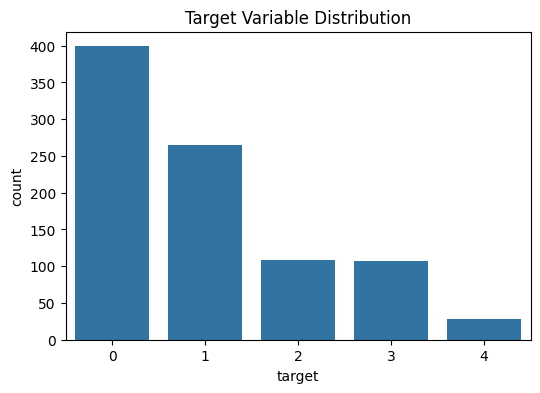

In [61]:
 # Distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x=df['target']) # Assuming 'target' is the column for classification
plt.title("Target Variable Distribution")
plt.show()

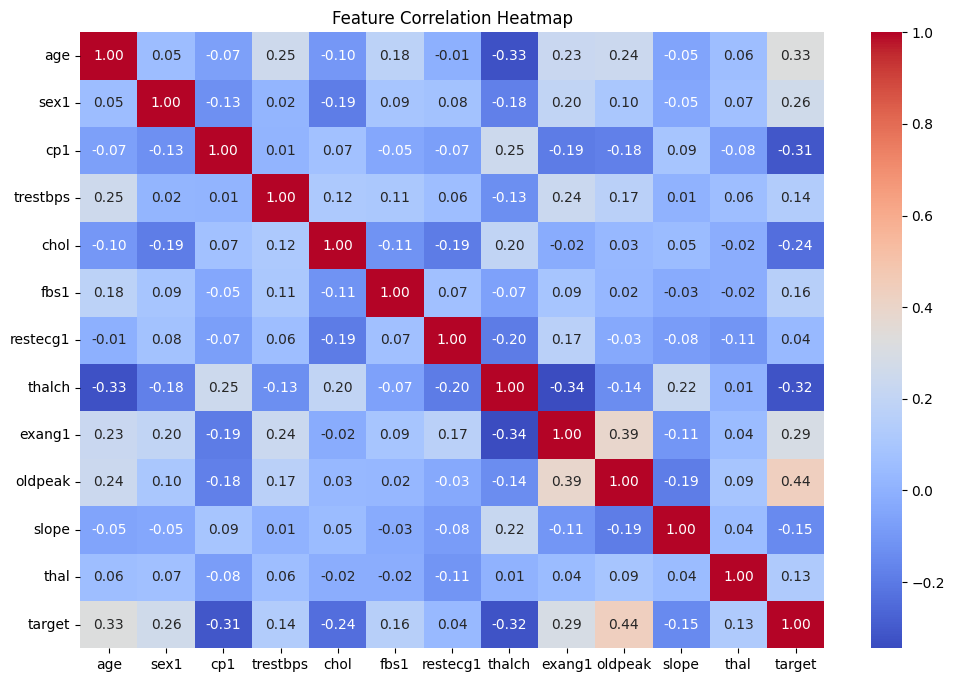

In [62]:
# Check correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [63]:
# Step 3: Feature Engineering
# Convert categorical variables (if any) using Label Encoding or One-Hot Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting the dataset into features and target variable
X = df.drop(columns=['target'])  # Assuming 'target' is the dependent variable
y = df['target']


In [64]:
# Normalize numerical features (Optional, if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Accuracy: 0.5164835164835165
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73        89
           1       0.42      0.40      0.41        48
           2       0.31      0.36      0.33        22
           3       0.13      0.12      0.12        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.32      0.32      0.32       182
weighted avg       0.51      0.52      0.51       182

Confusion Matrix:
 [[65 12  6  3  3]
 [17 19  7  4  1]
 [ 4  5  8  5  0]
 [ 3  6  4  2  2]
 [ 1  3  1  1  0]]
Unique Target Values: [0 1 2 3 4]


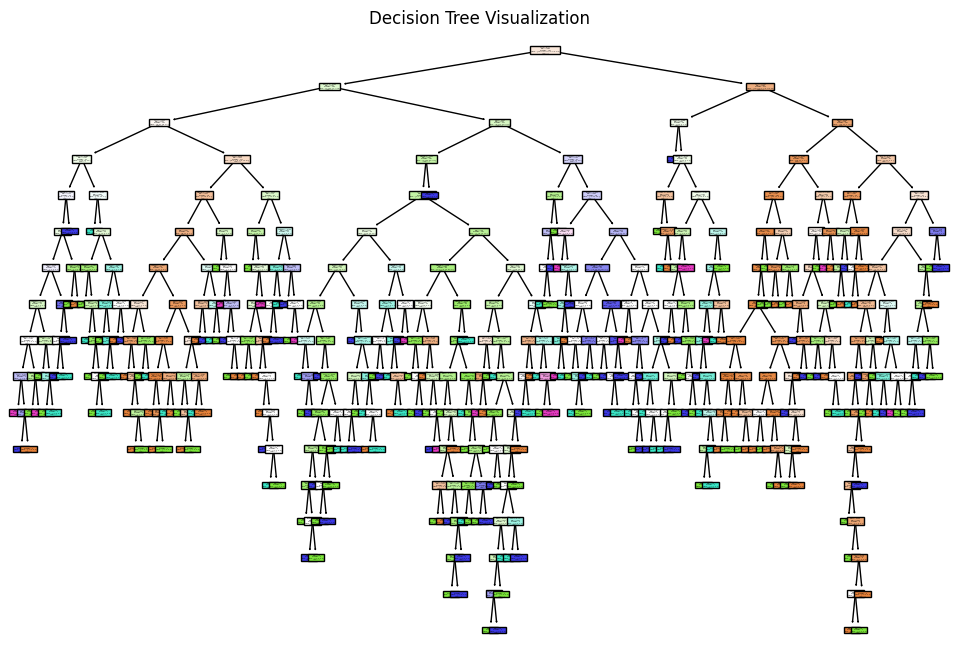

In [66]:
# Step 4: Train a Decision Tree Model
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Check unique values in target column
print("Unique Target Values:", np.unique(y))

# Get class labels dynamically
class_labels = [str(cls) for cls in np.unique(y)]


# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=class_labels)
plt.title("Decision Tree Visualization")
plt.show()


In [67]:
# Step 5: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Train Decision Tree with best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Model Accuracy: 0.5604395604395604
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78        89
           1       0.41      0.58      0.48        48
           2       0.12      0.05      0.07        22
           3       0.20      0.12      0.15        17
           4       0.00      0.00      0.00         6

    accuracy                           0.56       182
   macro avg       0.30      0.31      0.29       182
weighted avg       0.51      0.56      0.53       182



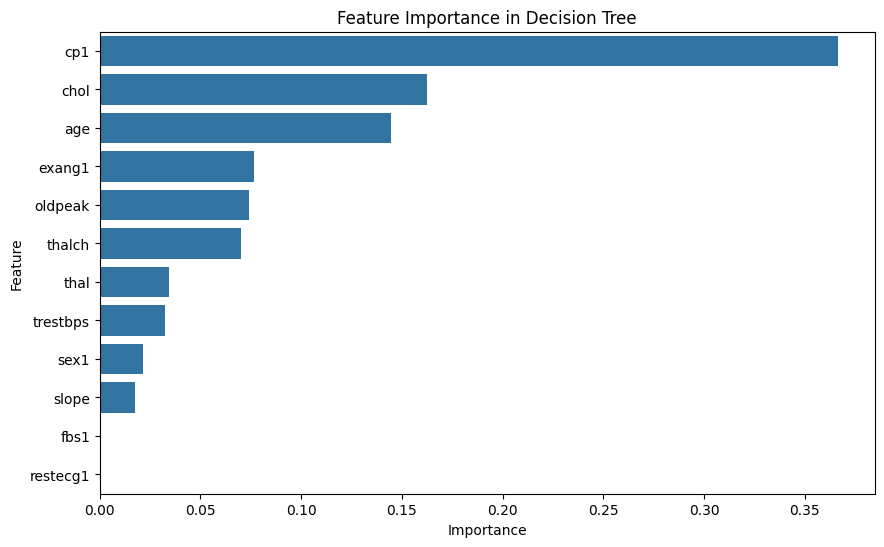

In [68]:
# Step 6: Model Interpretation
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance in Decision Tree")
plt.show()

In [ ]:
# Interview Questions:
# 1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
# Hyperparameter	                         Description
# max_depth:	        Limits how deep the tree can grow. A deeper tree captures more patterns but risks overfitting.
# min_samples_split:	The minimum number of samples required to split an internal node. Higher values prevent overfitting.
# min_samples_leaf:	  The minimum number of samples per leaf. Larger values create smoother decision boundaries.
# criterion:	        Determines how splits are chosen ("gini" for Gini impurity, "entropy" for information gain).
# max_features:	      Limits the number of features used for each split, helping generalization.
# 2.What is the difference between Label Encoding and One-Hot Encoding?
# Encoding Type	    Description	                                                                                      When to Use?
# Label Encoding:	  Converts categorical values into numeric labels (e.g., Red → 0, Blue → 1, Green → 2).	            When categorical values have an order (e.g., Low, Medium, High).
# One-Hot Encoding:	Creates binary columns for each category (e.g., Red → [1,0,0], Blue → [0,1,0], Green → [0,0,1]).	When categories are nominal (unordered) like colors, countries, etc.